In [1]:
import time

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
import torch.optim.lr_scheduler as scheduler
from torch.utils.data import random_split,DataLoader

import torchvision
from torchvision.datasets import CIFAR10,CIFAR100
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor,Normalize

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.device(0))

cuda
0
1
GeForce RTX 3090


In [3]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device)

True
학습을 진행하는 기기: cuda:0


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
root = './MNIST_Fashion'
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
train_data = dset.FashionMNIST(root=root, train=True, transform=transform, download=True)
test_data = dset.FashionMNIST(root=root, train=False, transform=transform, download=True)

In [8]:
tr,vs,_=random_split(train_data,[10000,10000,40000],torch.manual_seed(1))

In [11]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=4,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=4,out_channels=16,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.Linear(16*4*4, 100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
            nn.Linear(50,10),
            )
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        #out = out.view(out.size(0),-1) #Flatten feature mapes to one-dimension vector
        out = out.view(-1,16*4*4)
        out = self.layer3(out)
        return out


In [14]:
myCnn=MyCNN().to(device)
training_epochs=20
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.001, momentum=0.9)

In [17]:
tr_loader = torch.utils.data.DataLoader(dataset=tr, batch_size=4, 
                                           shuffle=True, drop_last=True)
vs_loader = torch.utils.data.DataLoader(dataset=vs, batch_size=4, 
                                           shuffle=True, drop_last=True)
ts_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=4, 
                                          shuffle=False, drop_last=True)

In [18]:
start=time.time()

training_loss_history=[]
validation_loss_history=[]

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
        training_loss+=cost.item()
        
    with torch.no_grad():
        for X,y in vs_loader:
            X=X.to(device)
            y=y.to(device)
            
            output=myCnn(X)
            cost=obj(output,y)
            
            validation_loss+=cost.item()
            
#    if epoch==39:        
#        sch.step()        
    training_loss_history.append(training_loss/(10000/batch_size))
    validation_loss_history.append(validation_loss/(10000/batch_size))
    print("[ Epoch: ",epoch+1," loss :",training_loss/(10000/batch_size)," validation :",validation_loss/(10000/batch_size),"]")
    
print("Time :",time.time()-start)

[ Epoch:  1  loss : 0.660095884194225  validation : 0.5971327767792158 ]
[ Epoch:  2  loss : 0.5411040220797527  validation : 0.581371510782151 ]
[ Epoch:  3  loss : 0.4861955541152507  validation : 0.48211076212925835 ]
[ Epoch:  4  loss : 0.4395908600517316  validation : 0.4525887119325576 ]
[ Epoch:  5  loss : 0.41199294465922864  validation : 0.46846452228690033 ]
[ Epoch:  6  loss : 0.38596458591861593  validation : 0.43302670407984406 ]
[ Epoch:  7  loss : 0.3657873960456229  validation : 0.4246892993893838 ]
[ Epoch:  8  loss : 0.3427699480109273  validation : 0.43103681500968233 ]
[ Epoch:  9  loss : 0.3267739317842992  validation : 0.42636610823704396 ]
[ Epoch:  10  loss : 0.3100489118610043  validation : 0.3968272996950036 ]
[ Epoch:  11  loss : 0.29307041708352116  validation : 0.3970092783737513 ]
[ Epoch:  12  loss : 0.2816975655760591  validation : 0.39120431709223485 ]
[ Epoch:  13  loss : 0.2654633571109145  validation : 0.430252099845605 ]
[ Epoch:  14  loss : 0.25336

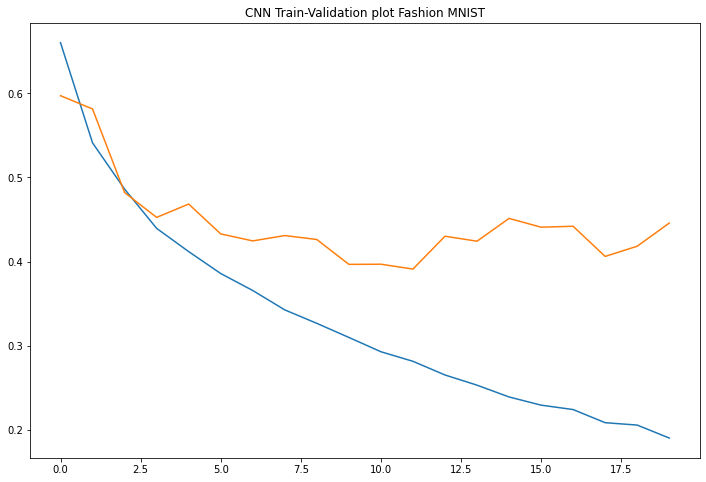

In [19]:
plt.figure(figsize=(12,8))
plt.plot(training_loss_history)
plt.plot(validation_loss_history)
plt.title("CNN Train-Validation plot Fashion MNIST")
plt.savefig("CNN Train-Validation plot Fashion MNIST.png")

In [20]:
myCnn=MyCNN().to(device)
training_epochs=12
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.001, momentum=0.9)

In [22]:
start=time.time()

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
print("Time :",time.time()-start)

Time : 83.50321555137634


In [23]:
start=time.time()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in ts_loader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = myCnn(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy :',(100 * correct / total))
print("Time :",time.time()-start)

Accuracy : 85.37
Time : 3.580400228500366
